In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Neuron:
    def __init__(self, position, orientation, depth, total_length, D, branch_angle, branches, h_tree=True, weave_type=None, randomness=0.0, curviness=None, curviness_magnitude=1.0):
        self.position = position
        self.orientation = orientation
        self.depth = depth
        self.total_length = total_length
        self.D = D
        self.branch_angle = branch_angle
        self.branches = branches
        self.h_tree = h_tree
        self.weave_type = weave_type
        self.randomness = randomness
        self.curviness = curviness
        self.curviness_magnitude = curviness_magnitude
        self.branch_lengths = self._generate_branch_lengths()
        self.branches_list = []

    def _generate_branch_lengths(self):
        r = self.branches ** (-1 / self.D)
        branch_lengths = np.zeros(self.depth)
        normalization_factor = self.total_length / sum(r**i for i in range(self.depth))
        
        for i in range(self.depth):
            branch_lengths[i] = normalization_factor * r**i
        
        return branch_lengths

    def generate_branches(self):
        if self.h_tree:
            self._generate_htree_branches()
        else:
            self._generate_random_branches()
    
    def _generate_htree_branches(self):
        self._grow_branch(self.position[0], self.position[1], self.orientation + np.pi / 2, self.depth)
        self._grow_branch(self.position[0], self.position[1], self.orientation - np.pi / 2, self.depth)
    
    def _generate_random_branches(self):
        for i in range(self.branches):
            angle = self.orientation + np.random.uniform(-np.pi, np.pi)
            self._grow_branch(self.position[0], self.position[1], angle, self.depth)
    
    def _grow_branch(self, x, y, angle, depth):
        if depth == 0:
            return
        
        length = self.branch_lengths[len(self.branch_lengths) - depth]
        end_x = x + length * np.cos(angle)
        end_y = y + length * np.sin(angle)
        branch = [(x, y), (end_x, end_y)]
        self.branches_list.append(branch)
        
        for i in range(self.branches):
            new_angle = angle + (i - (self.branches - 1) / 2) * self.branch_angle
            if self.weave_type == 'Gauss':
                new_angle += np.random.normal(0, self.randomness)
            elif self.weave_type == 'Uniform':
                new_angle += np.random.uniform(-self.randomness, self.randomness)
            self._grow_branch(end_x, end_y, new_angle, depth - 1)

    def _draw_weaving_line(self, x1, y1, x2, y2):
        num_points = int(self.curviness_magnitude * 10)
        xs = np.linspace(x1, x2, num_points)
        ys = np.linspace(y1, y2, num_points)
        
        if self.curviness == 'Gauss':
            perturb_xs = xs + np.random.normal(0, 1, num_points)
            perturb_ys = ys + np.random.normal(0, 1, num_points)
        elif self.curviness == 'Uniform':
            perturb_xs = xs + np.random.uniform(-1, 1, num_points)
            perturb_ys = ys + np.random.uniform(-1, 1, num_points)
        else:
            perturb_xs = xs
            perturb_ys = ys
            
        perturb_xs[0], perturb_ys[0] = x1, y1
        perturb_xs[-1], perturb_ys[-1] = x2, y2
        
        plt.plot(perturb_xs, perturb_ys, 'k-')

    def grow(self):
        pass

    def connect(self, other_neuron):
        pass

    def draw(self):
        for branch in self.branches_list:
            self._draw_weaving_line(branch[0][0], branch[0][1], branch[1][0], branch[1][1])

class Network:
    def __init__(self):
        self.neurons = []

    def add_neuron(self, neuron):
        self.neurons.append(neuron)

    def generate_network(self):
        pass

    def simulate(self):
        pass

    def draw(self):
        plt.figure(figsize=(8, 8))
        for neuron in self.neurons:
            neuron.draw()
        plt.axis('equal')
        plt.show()

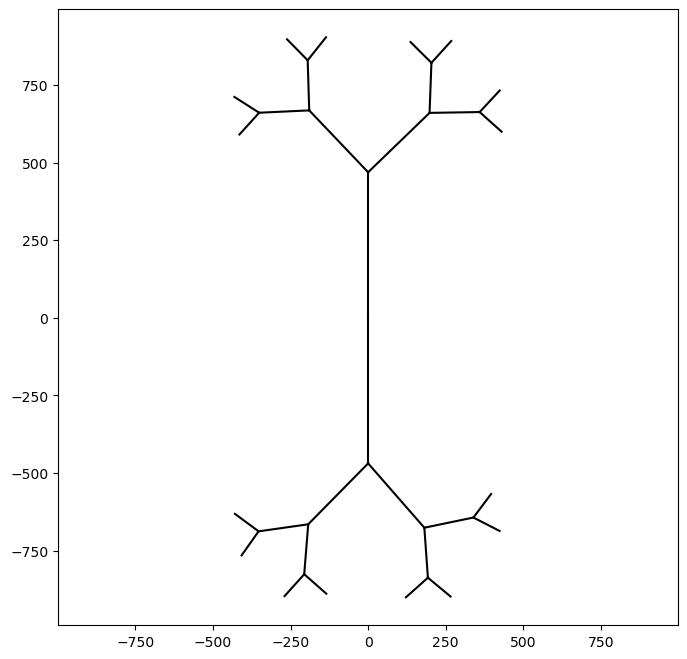

[468.83075739 275.07717811 161.39609598  94.69596852]


In [3]:
# Parameters
x = 0  # X-coordinate of the root
y = 0  # Y-coordinate of the root
Lt = 1000  # Total length of the tree
depth = 4  # Number of iterations
branch_angle = np.pi / 2  # Angle from the last branch (90 degrees for H-tree)
branches = 2  # Number of branches split per iteration
D = 1.3  # Fractal dimension

# Weave options: None, 'Gauss', 'Uniform'
weave_type = 'Gauss'  # For branch angles and lengths
randomness = 0.1  # Degree of randomness in angles and lengths
curviness = None  # For the curviness of the branches themselves
curviness_magnitude = 0.7  # Degree of curviness for the branches

# Create a neuron and generate its branches
neuron = Neuron((x, y), 0, depth, Lt, D, branch_angle, branches, h_tree=True, weave_type=weave_type, randomness=randomness, curviness=curviness, curviness_magnitude=curviness_magnitude)
neuron.generate_branches()

# Create a network and add the neuron
network = Network()
network.add_neuron(neuron)

# Draw the network

network.draw()
print(neuron.branch_lengths)


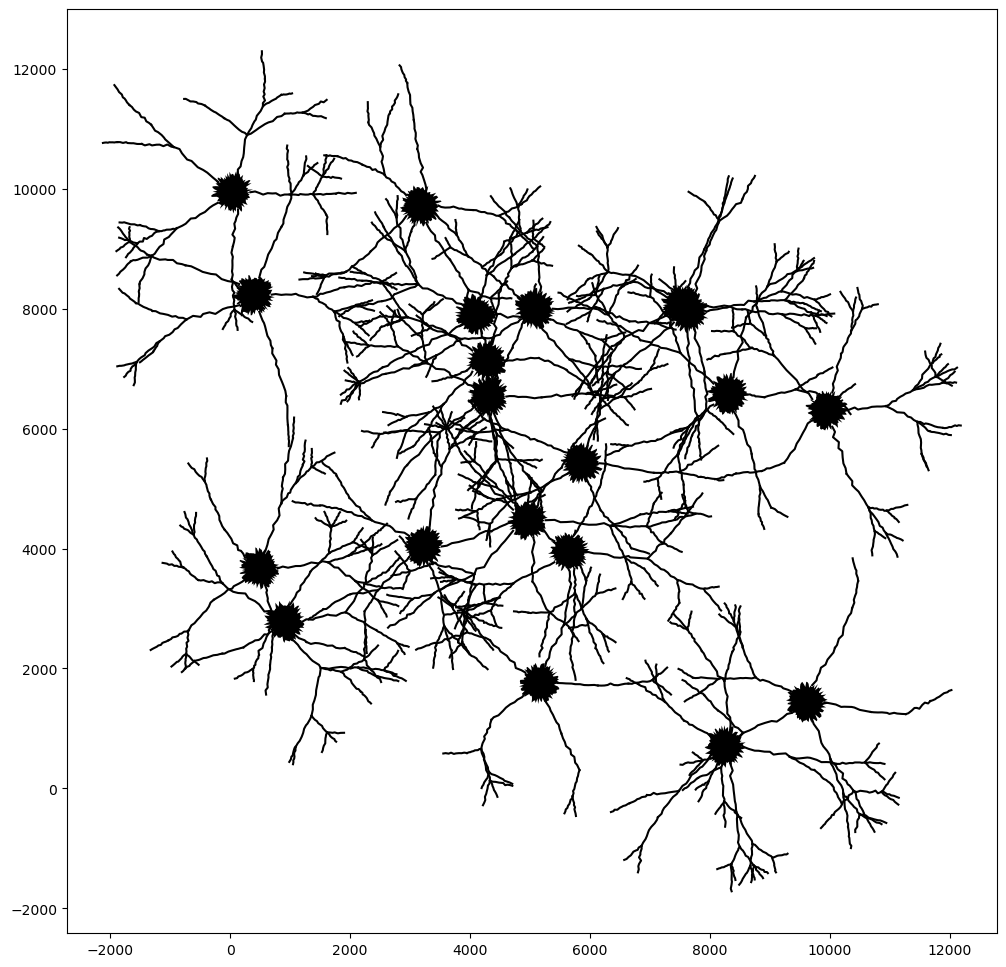

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, position, depth, total_length, D, branch_angle, mean_branches, soma_radius, weave_type=None, randomness=0.0, curviness=None, curviness_magnitude=1.0, num_primary_branches=8):
        self.position = position
        self.depth = depth
        self.total_length = total_length
        self.D = D
        self.branch_angle = branch_angle
        self.mean_branches = mean_branches
        self.soma_radius = soma_radius  # Soma radius, determines size of the soma
        self.weave_type = weave_type
        self.randomness = randomness
        self.curviness = curviness
        self.curviness_magnitude = curviness_magnitude
        self.num_primary_branches = num_primary_branches
        self.branch_lengths = self._generate_branch_lengths()
        self.branches_list = []

    def _generate_branch_lengths(self):
        r = self.mean_branches ** (-1 / self.D)
        branch_lengths = np.zeros(self.depth)
        normalization_factor = self.total_length / sum(r**i for i in range(self.depth))
        
        for i in range(self.depth):
            branch_lengths[i] = normalization_factor * r**i
        
        return branch_lengths

    def _generate_soma(self):
        # Generate a rough, slightly irregular circle to represent the soma
        theta = np.linspace(0, 2 * np.pi, 100)
        radius_variation = np.random.uniform(-0.2, 0.2, len(theta)) * self.soma_radius
        x_soma = (self.soma_radius + radius_variation) * np.cos(theta) + self.position[0]
        y_soma = (self.soma_radius + radius_variation) * np.sin(theta) + self.position[1]
        return x_soma, y_soma

    def _generate_dendrite_start_points(self):
        # Generate start points for dendrites at the edge of the soma
        angles = np.linspace(0, 2 * np.pi, self.num_primary_branches, endpoint=False)
        start_points = []
        for angle in angles:
            x = self.position[0] + self.soma_radius * np.cos(angle)
            y = self.position[1] + self.soma_radius * np.sin(angle)
            start_points.append((x, y))
        return start_points

    def generate_branches(self):
        start_points = self._generate_dendrite_start_points()
        
        for start_point in start_points:
            self._grow_branch(start_point[0], start_point[1], np.arctan2(start_point[1] - self.position[1], start_point[0] - self.position[0]), self.depth)
    
    def _grow_branch(self, x, y, angle, depth):
        if depth == 0:
            return
        
        length = self.branch_lengths[len(self.branch_lengths) - depth]
        if self.weave_type == 'Gauss':
            length *= 1 + np.random.normal(0, self.randomness)
            angle += np.random.normal(0, self.randomness)
        elif self.weave_type == 'Uniform':
            length *= 1 + np.random.uniform(-self.randomness, self.randomness)
            angle += np.random.uniform(-self.randomness, self.randomness)
        
        end_x = x + length * np.cos(angle)
        end_y = y + length * np.sin(angle)
        
        self.branches_list.append([(x, y), (end_x, end_y), length, depth])
        
        branches = int(np.clip(np.round(np.random.normal(self.mean_branches, 1)), 1, None))

        for i in range(branches):
            new_angle = angle + self.branch_angle * (i - (branches - 1) / 2)
            if self.weave_type == 'Gauss':
                new_angle += np.random.normal(0, self.randomness)
            elif self.weave_type == 'Uniform':
                new_angle += np.random.uniform(-self.randomness, self.randomness)
            self._grow_branch(end_x, end_y, new_angle, depth - 1)

    def _draw_weaving_line(self, x1, y1, x2, y2, length):
        num_points = int(self.curviness_magnitude * 10)
        xs = np.linspace(x1, x2, num_points)
        ys = np.linspace(y1, y2, num_points)
        
        if self.curviness == 'Gauss':
            perturb_xs = xs + (length // 50) * np.random.normal(0, 1, num_points)
            perturb_ys = ys + (length // 50) * np.random.normal(0, 1, num_points)
        elif self.curviness == 'Uniform':
            perturb_xs = xs + (length // 50) * np.random.uniform(-1, 1, num_points)
            perturb_ys = ys + (length // 50) * np.random.uniform(-1, 1, num_points)
        else:
            perturb_xs = xs
            perturb_ys = ys
            
        perturb_xs[0], perturb_ys[0] = x1, y1
        perturb_xs[-1], perturb_ys[-1] = x2, y2
        
        plt.plot(perturb_xs, perturb_ys, 'k-')

    def draw(self):
        # Draw the soma
        x_soma, y_soma = self._generate_soma()
        plt.fill(x_soma, y_soma, 'black')
        
        # Draw the branches
        for branch in self.branches_list:
            self._draw_weaving_line(branch[0][0], branch[0][1], branch[1][0], branch[1][1], branch[2])

    def connect(self, connection_threshold=5.0):
        for i, branch1 in enumerate(self.branches_list):
            for j, branch2 in enumerate(self.branches_list):
                if i != j:  # Don't compare the same branch
                    dist = np.linalg.norm(np.array(branch1[1]) - np.array(branch2[1]))
                    if dist < connection_threshold:
                        if branch1[2] < branch2[2]:  # branch1 is shorter
                            branch1[3] = 0  # Stop growing branch1
                        else:  # branch2 is shorter
                            branch2[3] = 0  # Stop growing branch2

    def connect_to_other(self, other_neuron, connection_threshold=5.0):
        for branch1 in self.branches_list:
            for branch2 in other_neuron.branches_list:
                dist = np.linalg.norm(np.array(branch1[1]) - np.array(branch2[1]))
                if dist < connection_threshold:
                    if branch1[2] < branch2[2]:  # branch1 is shorter
                        branch1[3] = 0  # Stop growing branch1
                    else:  # branch2 is shorter
                        branch2[3] = 0  # Stop growing branch2

class Network:
    def __init__(self, width, height, num_neurons, neuron_params):
        self.width = width
        self.height = height
        self.num_neurons = num_neurons
        self.neuron_params = neuron_params
        self.neurons = []

    def seed_neurons(self):
        for _ in range(self.num_neurons):
            position = (np.random.uniform(0, self.width), np.random.uniform(0, self.height))
            neuron = Neuron(position, **self.neuron_params)
            neuron.generate_branches()
            neuron.connect()  # Connect branches within the same neuron
            self.neurons.append(neuron)

    def generate_network(self):
        self.seed_neurons()

    def simulate_connections(self):
        for i, neuron in enumerate(self.neurons):
            for j in range(i + 1, len(self.neurons)):
                neuron.connect_to_other(self.neurons[j])

    def draw(self):
        plt.figure(figsize=(12, 12))
        for neuron in self.neurons:
            neuron.draw()
        plt.axis('equal')
        plt.show()


# Parameters
network_width = 10000
network_height = 10000
num_neurons = 20  # Number of neurons to seed in the network

# Neuron-specific parameters
neuron_params = {
    'depth': 4,
    'total_length': 2000,
    'D': 1.5,
    'branch_angle': np.pi / 4,
    'mean_branches': 1.5,
    'soma_radius': 300,  # Size of the soma
    'weave_type': 'Gauss',
    'randomness': 0.2,
    'curviness': 'Gauss',
    'curviness_magnitude': 1,
    'num_primary_branches': 5
}

# Create and generate the network
network = Network(network_width, network_height, num_neurons, neuron_params)
network.generate_network()

# Simulate connections between neurons
network.simulate_connections()

# Draw the network
network.draw()


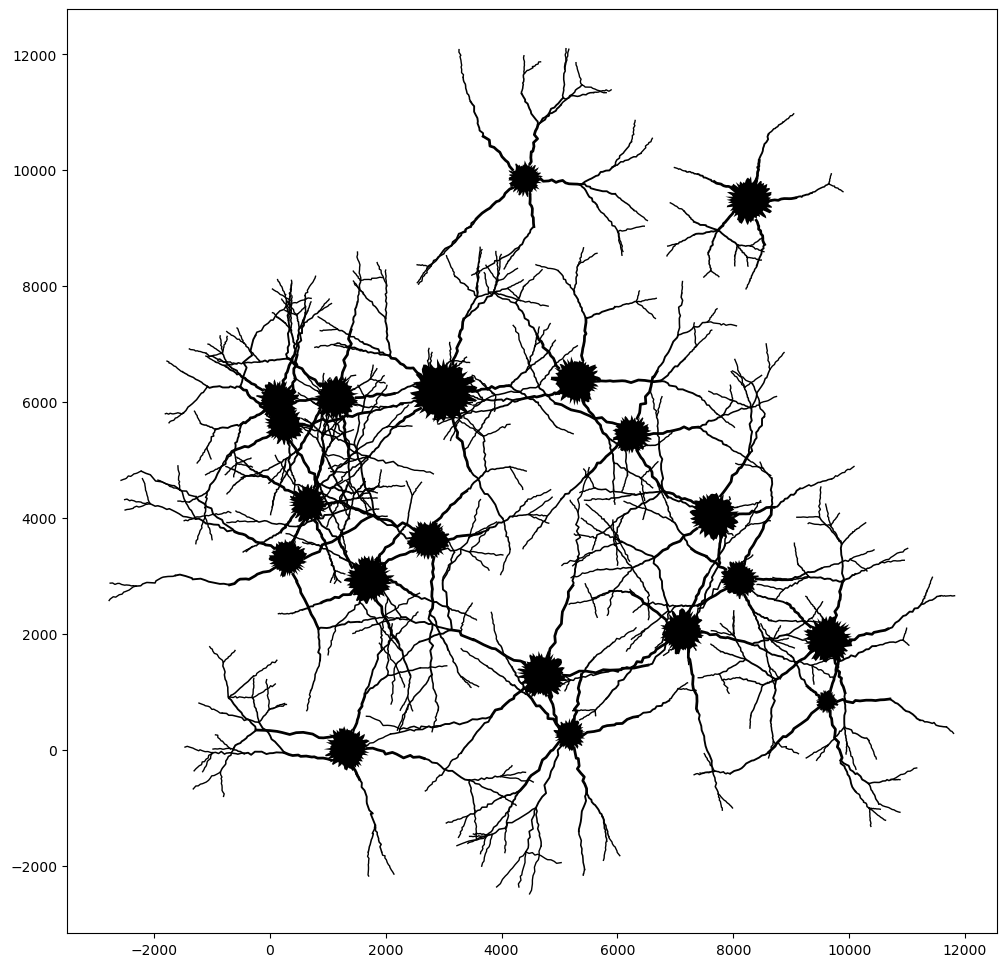

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, position, depth, mean_length, std_length, D, branch_angle, mean_branches, mean_soma_radius, std_soma_radius, 
                 weave_type=None, randomness=0.0, curviness=None, curviness_magnitude=1.0, num_primary_branches=4, initial_thickness = 5):
        
        self.position = position
        self.depth = depth
        # Sample total length and soma size from a normal distribution
        self.total_length = max(np.random.normal(mean_length, std_length), 0)  # Ensure non-negative length
        self.soma_radius = max(np.random.normal(mean_soma_radius, std_soma_radius), 0)  # Ensure non-negative radius
        self.D = D
        self.branch_angle = branch_angle
        self.mean_branches = mean_branches
        self.weave_type = weave_type
        self.randomness = randomness
        self.curviness = curviness
        self.curviness_magnitude = curviness_magnitude
        self.num_primary_branches = num_primary_branches
        self.branch_lengths = self._generate_branch_lengths()
        self.initial_thickness = initial_thickness  # Initial thickness of the dendrite
        self.branches_list = []

    def _generate_branch_lengths(self):
        r = self.mean_branches ** (-1 / self.D)
        branch_lengths = np.zeros(self.depth)
        normalization_factor = self.total_length / sum(r**i for i in range(self.depth))
        
        for i in range(self.depth):
            branch_lengths[i] = normalization_factor * r**i
        
        return branch_lengths

    def _calculate_thickness(self, current_length):
        """
        Calculate the thickness of the dendrite based on its length.
        The thickness decreases in a fractal manner as the distance from the soma increases.
        """
        # Assume thickness tapers according to a power law related to distance and fractal dimension D
        return self.initial_thickness * (current_length / self.total_length) ** (-1 / self.D)

    def _generate_soma(self):
        # Generate a rough, slightly irregular circle to represent the soma
        theta = np.linspace(0, 2 * np.pi, 100)
        radius_variation = np.random.uniform(-0.2, 0.2, len(theta)) * self.soma_radius
        x_soma = (self.soma_radius + radius_variation) * np.cos(theta) + self.position[0]
        y_soma = (self.soma_radius + radius_variation) * np.sin(theta) + self.position[1]
        return x_soma, y_soma

    def _generate_dendrite_start_points(self):
        # Generate start points for dendrites at the edge of the soma
        angles = np.linspace(0, 2 * np.pi, self.num_primary_branches, endpoint=False)
        start_points = []
        for angle in angles:
            x = self.position[0] + self.soma_radius * np.cos(angle)
            y = self.position[1] + self.soma_radius * np.sin(angle)
            start_points.append((x, y))
        return start_points

    def generate_branches(self):
        start_points = self._generate_dendrite_start_points()
        
        for start_point in start_points:
            self._grow_branch(start_point[0], start_point[1], np.arctan2(start_point[1] - self.position[1], start_point[0] - self.position[0]), self.depth)
    
    def _grow_branch(self, x, y, angle, depth):
        if depth == 0:
            return
        
        length = self.branch_lengths[len(self.branch_lengths) - depth]
        if self.weave_type == 'Gauss':
            length *= 1 + np.random.normal(0, self.randomness)
            angle += np.random.normal(0, self.randomness)
        elif self.weave_type == 'Uniform':
            length *= 1 + np.random.uniform(-self.randomness, self.randomness)
            angle += np.random.uniform(-self.randomness, self.randomness)
        
        end_x = x + length * np.cos(angle)
        end_y = y + length * np.sin(angle)
        
        # Calculate thickness at the current length
        current_length = sum(self.branch_lengths[:len(self.branch_lengths) - depth + 1])
        thickness = self._calculate_thickness(current_length)

        self.branches_list.append([(x, y), (end_x, end_y), length, thickness, depth])
        
        branches = int(np.clip(np.round(np.random.normal(self.mean_branches, 1)), 1, None))

        for i in range(branches):
            new_angle = angle + self.branch_angle * (i - (branches - 1) / 2)
            if self.weave_type == 'Gauss':
                new_angle += np.random.normal(0, self.randomness)
            elif self.weave_type == 'Uniform':
                new_angle += np.random.uniform(-self.randomness, self.randomness)
            self._grow_branch(end_x, end_y, new_angle, depth - 1)

    def _draw_weaving_line(self, x1, y1, x2, y2, length, thickness):
        num_points = int(self.curviness_magnitude * 10)
        xs = np.linspace(x1, x2, num_points)
        ys = np.linspace(y1, y2, num_points)
        
        if self.curviness == 'Gauss':
            perturb_xs = xs + (length // 50) * np.random.normal(0, 1, num_points)
            perturb_ys = ys + (length // 50) * np.random.normal(0, 1, num_points)
        elif self.curviness == 'Uniform':
            perturb_xs = xs + (length // 50) * np.random.uniform(-1, 1, num_points)
            perturb_ys = ys + (length // 50) * np.random.uniform(-1, 1, num_points)
        else:
            perturb_xs = xs
            perturb_ys = ys
            
        perturb_xs[0], perturb_ys[0] = x1, y1
        perturb_xs[-1], perturb_ys[-1] = x2, y2
        
        plt.plot(perturb_xs, perturb_ys, 'k-', linewidth=thickness)

    def draw(self):
        # Draw the soma
        x_soma, y_soma = self._generate_soma()
        plt.fill(x_soma, y_soma, 'black')
        
        # Draw the branches
        for branch in self.branches_list:
            self._draw_weaving_line(branch[0][0], branch[0][1], branch[1][0], branch[1][1], branch[2], branch[3])



    def connect(self, connection_threshold=5.0):
        for i, branch1 in enumerate(self.branches_list):
            for j, branch2 in enumerate(self.branches_list):
                if i != j:  # Don't compare the same branch
                    dist = np.linalg.norm(np.array(branch1[1]) - np.array(branch2[1]))
                    if dist < connection_threshold:
                        if branch1[2] < branch2[2]:  # branch1 is shorter
                            branch1[3] = 0  # Stop growing branch1
                        else:  # branch2 is shorter
                            branch2[3] = 0  # Stop growing branch2

    def connect_to_other(self, other_neuron, connection_threshold=5.0):
        for branch1 in self.branches_list:
            for branch2 in other_neuron.branches_list:
                dist = np.linalg.norm(np.array(branch1[1]) - np.array(branch2[1]))
                if dist < connection_threshold:
                    if branch1[2] < branch2[2]:  # branch1 is shorter
                        branch1[3] = 0  # Stop growing branch1
                    else:  # branch2 is shorter
                        branch2[3] = 0  # Stop growing branch2

class Network:
    def __init__(self, width, height, num_neurons, neuron_params):
        self.width = width
        self.height = height
        self.num_neurons = num_neurons
        self.neuron_params = neuron_params
        self.neurons = []

    def seed_neurons(self):
        for _ in range(self.num_neurons):
            position = (np.random.uniform(0, self.width), np.random.uniform(0, self.height))
            neuron = Neuron(position, **self.neuron_params)
            neuron.generate_branches()
            neuron.connect()  # Connect branches within the same neuron
            self.neurons.append(neuron)

    def generate_network(self):
        self.seed_neurons()

    def simulate_connections(self):
        for i, neuron in enumerate(self.neurons):
            for j in range(i + 1, len(self.neurons)):
                neuron.connect_to_other(self.neurons[j])

    def draw(self):
        plt.figure(figsize=(12, 12))
        for neuron in self.neurons:
            neuron.draw()
        plt.axis('equal')
        plt.show()


# Parameters
network_width = 10000
network_height = 10000
num_neurons = 20  # Number of neurons to seed in the network

# Neuron-specific parameters with Gaussian distribution
neuron_params = {
    'depth': 4,
    'mean_length': 2000,
    'std_length': 500,
    'D': 1.5,
    'branch_angle': np.pi / 4,
    'mean_branches': 1.5,
    'mean_soma_radius': 300,  # Mean size of the soma
    'std_soma_radius': 100,    # Standard deviation for soma size
    'weave_type': 'Gauss',
    'randomness': 0.25,
    'curviness': 'Gauss',
    'curviness_magnitude': 1.2,
    'num_primary_branches': 5,
    'initial_thickness': 1
}

# Create and generate the network
network = Network(network_width, network_height, num_neurons, neuron_params)
network.generate_network()

# Simulate connections between neurons
network.simulate_connections()

# Draw the network
network.draw()


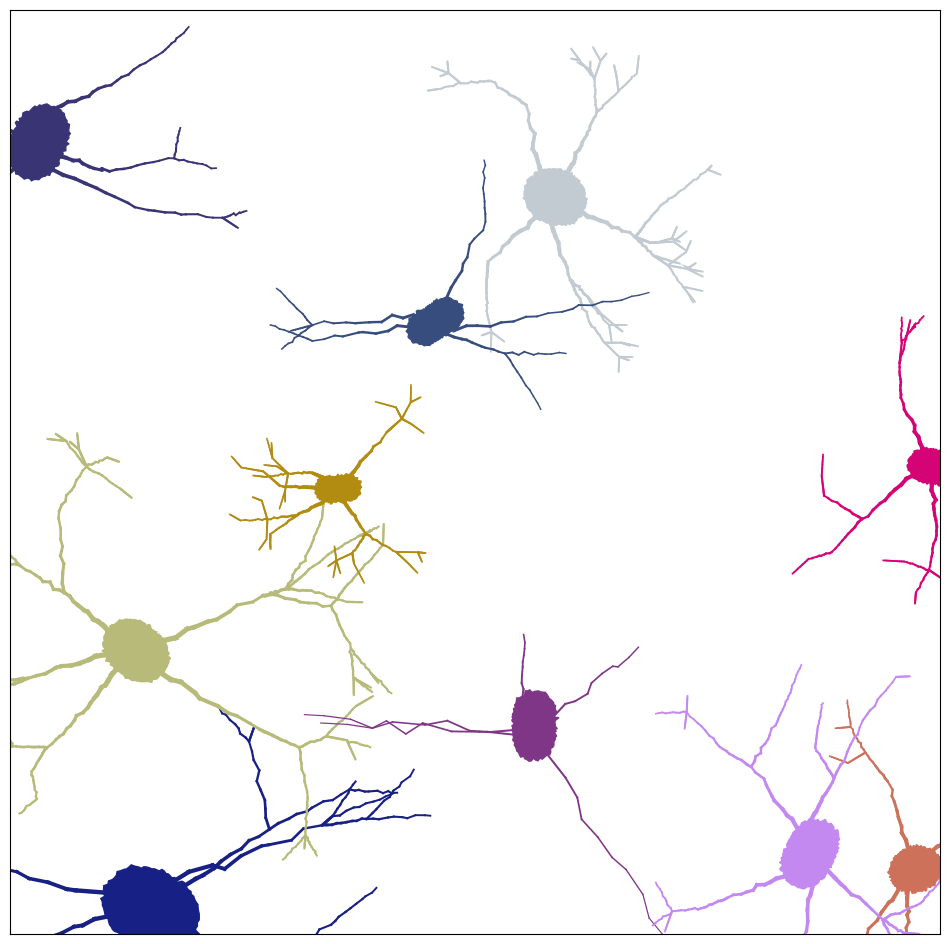

In [89]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, position, depth, mean_soma_radius, std_soma_radius, D, branch_angle, mean_branches, weave_type=None, randomness=0.0, 
                 curviness=None, curviness_magnitude=1.0, num_primary_branches=4):
        
        self.position = position
        #self.depth = depth
        
        self.depth = np.ceil(np.random.normal(3,1)).astype(int)  
        self.soma_radius = max(np.random.normal(mean_soma_radius, std_soma_radius), 0)  # Ensure non-negative radius
        self.total_length = self._scale_total_length()
        self.initial_thickness = self._scale_initial_thickness()
        
        self.D = D
        self.branch_angle = branch_angle
        self.mean_branches = mean_branches
        self.weave_type = weave_type
        self.randomness = randomness
        self.curviness = curviness
        self.curviness_magnitude = curviness_magnitude
        self.num_primary_branches = num_primary_branches
        self.branch_lengths = self._generate_branch_lengths()
        self.branches_list = []
        
        # Generate soma shape once and store
        self.x_soma, self.y_soma = self._generate_soma()

    def _scale_total_length(self):
        base_length = 40  # A base length for the dendrites
        length_variation_factor = 5  # A factor to scale variability
        total_length = base_length + (self.soma_radius * length_variation_factor) * np.random.uniform(0.8, 1.2)
        return max(total_length, 0)

    def _scale_initial_thickness(self):
        base_thickness = 1  # A base thickness
        thickness_factor = 0.001  # A factor to scale thickness with soma size and total length
        initial_thickness = base_thickness + thickness_factor * (self.soma_radius + self.total_length)
        return max(initial_thickness, 1)  # Ensure minimum thickness

    def _generate_branch_lengths(self):
        r = self.mean_branches ** (-1 / self.D)
        branch_lengths = np.zeros(self.depth)
        normalization_factor = self.total_length / sum(r**i for i in range(self.depth))
        
        for i in range(self.depth):
            branch_lengths[i] = normalization_factor * r**i
        
        return branch_lengths
    
    def _generate_soma(self):
        # Generate an irregular, but less spiky, shape to represent the soma
        theta = np.linspace(0, 2 * np.pi, 100)
        sine_variation = np.random.uniform(0, 15) * np.sin(2 * theta)  # Smooth sinusoidal variation
        gaussian_variation = np.random.normal(0, 2, len(theta))  # Small random Gaussian noise
        ellipse_ratio = np.random.uniform(0.8, 1.2)  # Control the degree of elongation

        elongation_angle = np.random.uniform(0, 2 * np.pi)  # Random angle for elongation direction
        x_soma = (self.soma_radius + gaussian_variation + sine_variation) * (np.cos(theta) * np.cos(elongation_angle) - np.sin(theta) * np.sin(elongation_angle) * ellipse_ratio) + self.position[0]
        y_soma = (self.soma_radius + gaussian_variation + sine_variation) * (np.sin(theta) * np.cos(elongation_angle) + np.cos(theta) * np.sin(elongation_angle) * ellipse_ratio) + self.position[1]
        
        return x_soma, y_soma

    def _calculate_thickness(self, distance_from_start, segment_length):
        thickness_at_start = self.initial_thickness * (distance_from_start / self.total_length) ** (-1 / self.D)
        thickness_at_end = self.initial_thickness * ((distance_from_start + segment_length) / self.total_length) ** (-1 / self.D)
        return thickness_at_start, thickness_at_end

    def _generate_dendrite_start_points(self):
        start_points = []
        num_soma_points = len(self.x_soma)
        base_indices = np.linspace(0, num_soma_points - 1, self.num_primary_branches, endpoint=False).astype(int)

        # Introduce randomness to the indices
        random_offsets = np.random.randint(-num_soma_points // (100 // self.num_primary_branches // 1.5), 
                                                                (100 // self.num_primary_branches // 1.5) + 1, 
                                                                size=self.num_primary_branches)  # Random offsets
        
        random_indices = (base_indices + random_offsets) % num_soma_points  # Ensure indices stay within valid range

        # Use these randomized indices to select points on the soma perimeter
        for index in random_indices:
            start_points.append((self.x_soma[index], self.y_soma[index]))

        return start_points

    def _generate_branches(self):
        start_points = self._generate_dendrite_start_points()
        for start_point in start_points:
            self._grow_branch(start_point[0], start_point[1], np.arctan2(start_point[1] - self.position[1], start_point[0] - self.position[0]), self.depth)
    
    def _grow_branch(self, x, y, angle, depth):
        if depth == 0:
            return
        
        length = self.branch_lengths[len(self.branch_lengths) - depth]
        if self.weave_type == 'Gauss':
            length *= 1 + np.random.normal(0, self.randomness)
            angle += np.random.normal(0, self.randomness)
        elif self.weave_type == 'Uniform':
            length *= 1 + np.random.uniform(-self.randomness, self.randomness)
            angle += np.random.uniform(-self.randomness, self.randomness)
        
        end_x = x + length * np.cos(angle)
        end_y = y + length * np.sin(angle)
        
        current_length = sum(self.branch_lengths[:len(self.branch_lengths) - depth + 1])
        thickness_start, thickness_end = self._calculate_thickness(current_length, length)

        self.branches_list.append([(x, y), (end_x, end_y), length, thickness_start, thickness_end, depth])
        
        branches = int(np.clip(np.round(np.random.normal(self.mean_branches, 1)), 1, None))

        for i in range(branches):
            new_angle = angle + self.branch_angle * (i - (branches - 1) / 2)
            if self.weave_type == 'Gauss':
                new_angle += np.random.normal(0, self.randomness)
            elif self.weave_type == 'Uniform':
                new_angle += np.random.uniform(-self.randomness, self.randomness)
            self._grow_branch(end_x, end_y, new_angle, depth - 1)

    def _draw_weaving_line(self, x1, y1, x2, y2, length, thickness_start, thickness_end, color):
        num_points = int(self.curviness_magnitude * 10)
        xs = np.linspace(x1, x2, num_points)
        ys = np.linspace(y1, y2, num_points)
        thicknesses = np.linspace(thickness_start, thickness_end, num_points)
        
        if self.curviness == 'Gauss':
            perturb_xs = xs + (length // 50) * np.random.normal(0, 1, num_points)
            perturb_ys = ys + (length // 50) * np.random.normal(0, 1, num_points)
        elif self.curviness == 'Uniform':
            perturb_xs = xs + (length // 50) * np.random.uniform(-1, 1, num_points)
            perturb_ys = ys + (length // 50) * np.random.uniform(-1, 1, num_points)
        else:
            perturb_xs = xs
            perturb_ys = ys
            
        perturb_xs[0], perturb_ys[0] = x1, y1
        perturb_xs[-1], perturb_ys[-1] = x2, y2
        
        for i in range(num_points - 1):
            plt.plot(perturb_xs[i:i+2], perturb_ys[i:i+2], color=color, linewidth=thicknesses[i])

    def _draw(self, color):
        # Draw the soma
        plt.fill(self.x_soma, self.y_soma, color=color)
        
        # Draw the branches
        for branch in self.branches_list:
            self._draw_weaving_line(branch[0][0], branch[0][1], branch[1][0], branch[1][1], branch[2], branch[3], branch[4], color=color)

    def _connect_branches(self, other_neuron=None, connection_threshold=5.0):
        if other_neuron is None:
            for i, branch1 in enumerate(self.branches_list):
                for j, branch2 in enumerate(self.branches_list):
                    if i != j:
                        dist = np.linalg.norm(np.array(branch1[1]) - np.array(branch2[1]))
                        if dist < connection_threshold:
                            if branch1[2] < branch2[2]:
                                branch1[3] = 0
                            else:
                                branch2[3] = 0
        else:
            for branch1 in self.branches_list:
                for branch2 in other_neuron.branches_list:
                    dist = np.linalg.norm(np.array(branch1[1]) - np.array(branch2[1]))
                    if dist < connection_threshold:
                        if branch1[2] < branch2[2]:
                            branch1[3] = 0
                        else:
                            branch2[3] = 0

class Network:
    def __init__(self, width, height, num_neurons, neuron_params):
        self.width = width
        self.height = height
        self.num_neurons = num_neurons
        self.neuron_params = neuron_params
        self.neurons = []

    def _seed_neurons(self):
        for _ in range(self.num_neurons):
            position = (np.random.uniform(0, self.width), np.random.uniform(0, self.height))
            neuron = Neuron(position, **self.neuron_params)
            neuron._generate_branches()
            neuron._connect_branches()
            self.neurons.append(neuron)

    def _generate_network(self):
        self._seed_neurons()

    def _simulate_connections(self):
        for i, neuron in enumerate(self.neurons):
            for j in range(i + 1, len(self.neurons)):
                neuron._connect_branches(self.neurons[j])

    def draw(self):
        plt.figure(figsize=(12, 12))
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.gca().set_xticklabels([])
        plt.gca().set_yticklabels([])        
    
        # Draw each neuron with a different color
        for neuron in self.neurons:
            color = np.random.rand(3,)  # Random color for each neuron
            neuron._draw(color=color)
            
        plt.axis('equal')
        plt.xlim(0, self.width)
        plt.ylim(0, self.height)
        plt.show()
        
# Parameters
network_width = 2048
network_height = 2048
num_neurons = 10

# Neuron-specific parameters with Gaussian distribution
neuron_params = {
    'depth': 4,
    'mean_soma_radius': 60,
    'std_soma_radius': 15,
    'D': 1.2,
    'branch_angle': np.pi / 4,
    'mean_branches': 1.5,
    'weave_type': 'Gauss',
    'randomness': 0.3,
    'curviness': 'Gauss',
    'curviness_magnitude': 1,
    'num_primary_branches': 5
}

# Create and generate the network
network = Network(network_width, network_height, num_neurons, neuron_params)
network._generate_network()

# Simulate connections between neurons
network._simulate_connections()

# Draw the network
network.draw()
